In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [34]:
#Classification dataset
x, y= make_moons(n_samples=250,
                 noise= 0.05,
                 random_state= 42)

In [35]:
print(x.shape)
print(y.shape)

(250, 2)
(250,)


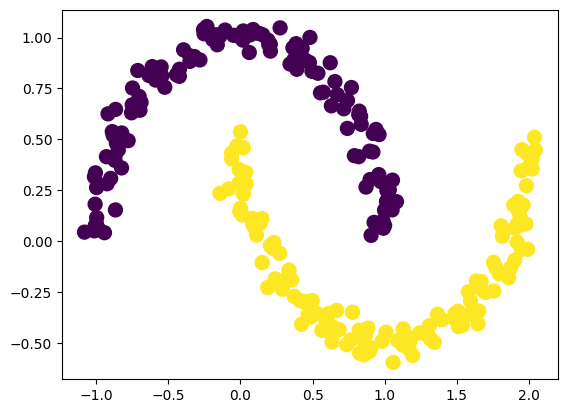

In [36]:
#plotting
          #col1     col2   color on the base of class
plt.scatter(x[:,0], x[:,1], c=y, s=100)
plt.show()

# 𝐕𝐚𝐧𝐢𝐬𝐡𝐢𝐧𝐠 𝐆𝐫𝐚𝐝𝐢𝐞𝐧𝐭 𝐏𝐫𝐨𝐛𝐥𝐞𝐦:

Problem when Weights Stop Changing During Backpropagation and due to which overall Loss do not decreases.

Weights Stop changing becuse when we find change in Loss with respect to different parameters, it is so small that when it is subtracted from old weights (According to gradient descent), the change in New Weights is Vanishingly Small.

*   Happens When you have a Deep Neural Network:
  Because when you have alot of layers you have to multiply the changes in weights with different parameter(according to chain rule) to get derivative of Loss with respect to W11, you have to go like: L depends on y_hat ---> H1 -----> Z (prediction) ------> W11

  So we have to go back according to Chain Rule where we will multiply these Changes (derivatives).
  Even if we multiply 0.1 x 0.1 x 0.1 x 0.1 = 0.0001 [which is very small number] So in case of deep neural network when things get more deeper the Final Value of W:  W_new= W_old-alpha * derivative
  * Above Change will be Vanishingly Small :)

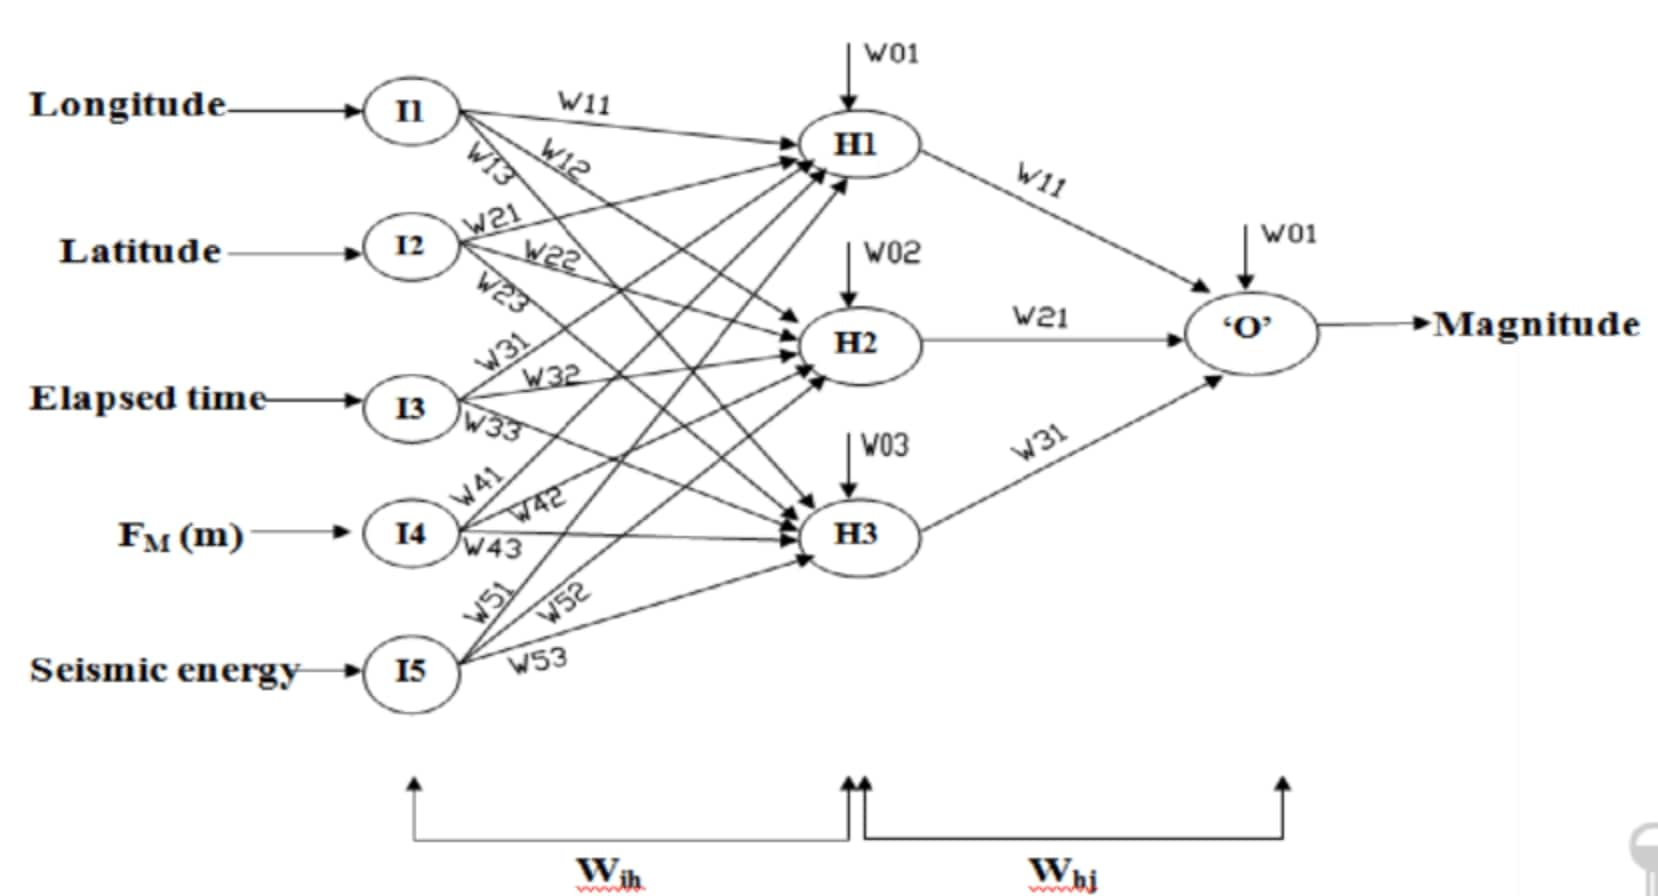
*   Happens When you use Sigmoid and Tanh Activation Function.
    Becuase it outputs the the small number between 0 to 1 even if the Input is Large.



**Lets make a Deep Neural Network:**

It will have alot of hidden layer so that we can correctly See Vanishing Gradient Descent Problem:

In [37]:
model= Sequential()

#adding layers
#input layer
model.add(Dense(10, activation= 'sigmoid', input_dim= 2))

#hidden layers -->10
model.add(Dense(10, activation= 'sigmoid'))
model.add(Dense(10, activation= 'sigmoid'))
model.add(Dense(10, activation= 'sigmoid'))
model.add(Dense(10, activation= 'sigmoid'))
model.add(Dense(10, activation= 'sigmoid'))
model.add(Dense(10, activation= 'sigmoid'))
model.add(Dense(10, activation= 'sigmoid'))
model.add(Dense(10, activation= 'sigmoid'))
model.add(Dense(10, activation= 'sigmoid'))
model.add(Dense(10, activation= 'sigmoid'))

#output layer
model.add(Dense(1, activation= 'sigmoid'))

In [38]:
#compiling the model
model.compile(loss= 'binary_crossentropy',
              optimizer= 'adam',
              metrics= ['accuracy'])

Now our weights for each layer and each connection has been initialized so we will store these old weights.

In [39]:
#to get the weights
model.get_weights()

[array([[ 0.55136997, -0.21056092, -0.6216104 , -0.64570624, -0.16103315,
         -0.37554848,  0.631448  , -0.513793  ,  0.28943908,  0.27637964],
        [-0.03409493,  0.2415992 ,  0.27935368,  0.4540463 ,  0.3976292 ,
          0.34604472,  0.5278012 ,  0.25019884,  0.31144208, -0.47149158]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.19742048,  0.2777192 , -0.5078839 ,  0.40020233, -0.24670634,
          0.22035527, -0.03516477,  0.34178495,  0.22574365, -0.33503538],
        [ 0.5320394 , -0.11395893,  0.3522507 , -0.09214655, -0.29933167,
          0.4552567 , -0.5473175 ,  0.39448696, -0.1032919 ,  0.1445359 ],
        [-0.04105467, -0.3689847 ,  0.2888052 ,  0.05408555,  0.20845091,
         -0.48957795,  0.42654026, -0.05083501, -0.41405544,  0.28422952],
        [-0.5376467 , -0.41987586, -0.19275957,  0.03106397,  0.11941761,
          0.48127937,  0.111516  , -0.4263595 ,  0.45877886, -0.37356243],
        [ 0.06795

In [40]:
#storing weights of first layer-->input layer
old_weights= model.get_weights()[0]
old_weights

array([[ 0.55136997, -0.21056092, -0.6216104 , -0.64570624, -0.16103315,
        -0.37554848,  0.631448  , -0.513793  ,  0.28943908,  0.27637964],
       [-0.03409493,  0.2415992 ,  0.27935368,  0.4540463 ,  0.3976292 ,
         0.34604472,  0.5278012 ,  0.25019884,  0.31144208, -0.47149158]],
      dtype=float32)

We have 20 weights as we have 2 inputs and 10 neuron so 2*10=20.

**Splitting the datasaet:**

In [41]:
x_train, x_test, y_train, y_test =  train_test_split(x,
                                                     y,
                                                     test_size= 0.20,
                                                     random_state= 42)

In [42]:
#training the model
model.fit(x_train,
            y_train,
            epochs=1)

7/7 [==============================] - 3s 6ms/step - loss: 0.7161 - accuracy: 0.4900


Now as our wights will be changed:

In [43]:
#new weights of first layer--->input layer
new_weights= model.get_weights()[0]
print("New_Weights\n", new_weights)
print("Old Weights\n", old_weights)

New_Weights
 [[ 0.5513979  -0.21055014 -0.62161165 -0.6457369  -0.16106454 -0.37554756
   0.6314839  -0.51379937  0.28939798  0.27641067]
 [-0.03413332  0.24158573  0.27935535  0.45409194  0.39766586  0.34604394
   0.5277548   0.25020763  0.31149036 -0.4715291 ]]
Old Weights
 [[ 0.55136997 -0.21056092 -0.6216104  -0.64570624 -0.16103315 -0.37554848
   0.631448   -0.513793    0.28943908  0.27637964]
 [-0.03409493  0.2415992   0.27935368  0.4540463   0.3976292   0.34604472
   0.5278012   0.25019884  0.31144208 -0.47149158]]


**You can see there are very small to no changes in above weights**

In [44]:
#if we find percentage change
percentage_change= abs(100*(old_weights-new_weights)/old_weights)
percentage_change

array([[0.00507002, 0.00511659, 0.00020136, 0.00474469, 0.01948782,
        0.00024601, 0.00569193, 0.0012413 , 0.01419898, 0.01122522],
       [0.11258387, 0.00557562, 0.00059743, 0.01004905, 0.00921885,
        0.00022392, 0.00879726, 0.00351388, 0.015502  , 0.00795796]],
      dtype=float32)

**You can now clearly see how small the changes are**

**Even if we train it for more number of epochs:**

In [45]:
#training the model for 100 epocs
model.fit(x_train,
            y_train,
            epochs=100)


#old and new weights of first layer after 100 epochs--->input layer
new_weights= model.get_weights()[0]
print("New_Weights\n", new_weights)
print("Old Weights\n", old_weights)


#if we find percentage change after 100 epochs training
percentage_change= abs(100*(old_weights-new_weights)/old_weights)
percentage_change

Epoch 1/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7093 - accuracy: 0.4900
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7042 - accuracy: 0.4900
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7004 - accuracy: 0.4900
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6978 - accuracy: 0.4900
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6959 - accuracy: 0.4900
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6946 - accuracy: 0.4900
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6936 - accuracy: 0.4900
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.4400
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5100
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 11/100
7/7 [===========

array([[ 6.4763317, 27.22314  ,  7.2216682,  3.4853566, 43.850086 ,
         5.5880194,  6.3934293,  4.5504904, 14.454804 , 12.616541 ],
       [95.05975  , 19.1737   , 15.374371 ,  4.770537 , 14.1341   ,
         5.1099467,  6.837619 ,  8.375457 , 10.4808   ,  6.06709  ]],
      dtype=float32)

**If you see closely loss came for 0.6937 to 0.6931 in 15 epochs and after that it got stucked in 0.6930 and 0.6931. Which clearly shows Vanishing Gradient Descent**

Can be confirmed by seeing old, new weights and percentage change also.

# Handling Vanishing Gradient Descent Problem:



1.   Reduce Model's Complexity:

    We can remove some hidden layers to handle it but this is not very applicable as shallow neural network will not be able to find those complex patterns in the data.

    But if your data is not very complex, it will work for You.



In [46]:
new_model= Sequential()

#adding layers
#input layer
new_model.add(Dense(10, activation= 'sigmoid', input_dim= 2))

#hidden layers -->2
new_model.add(Dense(10, activation= 'sigmoid'))
new_model.add(Dense(10, activation= 'sigmoid'))

#output layer
new_model.add(Dense(1, activation= 'sigmoid'))

#compiling the model
new_model.compile(loss= 'binary_crossentropy',
              optimizer= 'adam',
              metrics= ['accuracy'])

In [47]:
#storing weights of first layer-->input layer
old_weights= new_model.get_weights()[0]
old_weights

array([[ 0.28117055, -0.50470597,  0.3188873 ,  0.16883588, -0.3889124 ,
         0.02839464, -0.59744084,  0.14707768,  0.4158457 ,  0.00109851],
       [ 0.10319591, -0.65166277, -0.15014106,  0.530628  , -0.60822165,
        -0.6058134 ,  0.45759982, -0.18878096, -0.4494447 ,  0.59568006]],
      dtype=float32)

In [48]:
#training the new model for 100 epocs
new_model.fit(x_train,
            y_train,
            epochs=100)


#old and new weights of first layer after 100 epochs--->input layer
new_weights= new_model.get_weights()[0]
print("New_Weights\n", new_weights)
print("Old Weights\n", old_weights)


#if we find percentage change after 100 epochs training
percentage_change= abs(100*(old_weights-new_weights)/old_weights)
percentage_change

Epoch 1/100
7/7 [==============================] - 3s 7ms/step - loss: 0.6945 - accuracy: 0.4900
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.4900
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.4900
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.4900
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.6050
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.6350
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.5100
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6905 - accuracy: 0.5100
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6901 - accuracy: 0.5100
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6897 - accuracy: 0.5100
Epoch 11/100
7/7 [===========

array([[2.1151180e+02, 1.0992924e+02, 2.1818777e+01, 3.7711703e+02,
        2.0045016e+02, 2.3231982e+03, 7.1391808e+01, 9.8662882e+00,
        5.3061012e+01, 5.4407457e+04],
       [1.0442513e+03, 1.5825391e+02, 3.3756271e+02, 1.8748468e+02,
        1.8591809e+02, 1.8577551e+02, 2.2110118e+02, 2.2066406e+02,
        1.4600850e+02, 1.6584781e+02]], dtype=float32)

**If you see Loss, It has reduced through out the Epochs, and also weights have changed alot**

2.   Use Different Activation Functions:

We can Use ReLu that will not change the range of the positive number.



In [52]:
new_model_1= Sequential()

#adding layers
#input layer
new_model_1.add(Dense(10, activation= 'relu', input_dim= 2))

#hidden layers -->10 but with new activation function
new_model_1.add(Dense(10, activation= 'relu'))
new_model_1.add(Dense(10, activation= 'relu'))
new_model_1.add(Dense(10, activation= 'relu'))
new_model_1.add(Dense(10, activation= 'relu'))
new_model_1.add(Dense(10, activation= 'relu'))
new_model_1.add(Dense(10, activation= 'relu'))
new_model_1.add(Dense(10, activation= 'relu'))
new_model_1.add(Dense(10, activation= 'relu'))
new_model_1.add(Dense(10, activation= 'relu'))
new_model_1.add(Dense(10, activation= 'relu'))

#output layer
new_model_1.add(Dense(1, activation= 'sigmoid'))

#compiling the model
new_model_1.compile(loss= 'binary_crossentropy',
              optimizer= 'adam',
              metrics= ['accuracy'])


#storing weights of first layer-->input layer
old_weights= new_model.get_weights()[0]
old_weights


#training the new model for 100 epocs
new_model.fit(x_train,
            y_train,
            epochs=100)


#old and new weights of first layer after 100 epochs--->input layer
new_weights= new_model.get_weights()[0]
print("New_Weights\n", new_weights)
print("Old Weights\n", old_weights)


#if we find percentage change after 100 epochs training
percentage_change= abs(100*(old_weights-new_weights)/old_weights)
('Percentage Change in Weights:', percentage_change)

Epoch 1/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2876 - accuracy: 0.8700
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2874 - accuracy: 0.8750
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.2875 - accuracy: 0.8750
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.2878 - accuracy: 0.8750
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.2874 - accuracy: 0.8750
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.2874 - accuracy: 0.8700
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.2874 - accuracy: 0.8700
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2872 - accuracy: 0.8700
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2876 - accuracy: 0.8750
Epoch 10/100
7/7 [==============================] - 0s 15ms/step - loss: 0.2872 - accuracy: 0.8700
Epoch 11/100
7/7 [=========

('Percentage Change in Weights:',
 array([[ 7.0106645, 10.72606  ,  2.8805435,  0.4648613,  1.5020746,
          2.9559135,  8.098702 ,  8.325196 ,  3.3138344,  2.0164018],
        [ 5.71012  ,  3.6083777,  7.4285045,  5.738987 ,  5.184873 ,
          5.495287 ,  5.1151495,  6.0145164,  5.9886255,  5.505306 ]],
       dtype=float32))

**As we can see above by seeing the reduction is loss and Percentage Changes in Weights that we have handled the problem of Vanishing Gradient Descent by just changing the Activation Function**